# Example 1: Single Stellar Evolution Tracks

In this example, we evolve a single star (in the file [listSin.txt](listSin.txt) and we use the output to plot its track in the HR diagram. In addition we re-run SEVN using different stellar evolution tables. 

- To compile SEVN use the [compile.sh](compile.sh) or check complie in python will autocompile if needed

This example uses the Python Wrapper the however  equivelent runscript is given by
- The basic run  is [run_sse.sh](run_sse.sh) or [run_sse_parsecov05.sh](run_sse_parsecov05.sh)
- To run the alterative parsec table [run_sse_parsecov04.sh](run_sse_parsecov04.sh)
- To run using the MIST stellar tables: [run_sse_mist.sh](run_sse_mist.sh) (remember to set use tabuse_rhe=false, tabuse_rco=false, tabuse_envconv=false)

In [1]:
import pySEVN as SV

In [2]:
SEVN= "/home/jake/SEVN/sevndevel"
SV.set_path(SEVN)
SV.check_compile()

SEVN already compiled


In [3]:
import os

In [4]:
tutorials_path= '/home/jake/SEVN/tutorials'
list_path=os.path.join(SEVN,'resources','tutorial_MIAPbP','Example1_simplesse','listSin.txt')

#SEVN will autocreate folders in need be when ran
parsec_05 = os.path.join(tutorials_path, 'parsec_05')
parsec_04 = os.path.join(tutorials_path, 'parsec_04')
MIST = os.path.join(tutorials_path, 'MIST')

In [5]:
pc_04_table_path = os.path.join(SEVN,'tables','SEVNtracks_parsec_ov04_AGB')
MIST_table_path = os.path.join(SEVN,'tables','SEVNtracks_MIST_AGB')

sse_pc04 = SV.sse()
sse_pc04.update({'OUTPATH':parsec_04,'LISTBIN':list_path,'TABLES':pc_04_table_path})

sse_pc05 = SV.sse()#default tables
sse_pc05.update({'OUTPATH' : parsec_05, 'LISTBIN' : list_path})

sse_MIST= SV.sse()
sse_MIST.update({'OUTPATH':MIST,'LISTBIN':list_path,'TABLES':MIST_table_path,
                  'TABCONV':False,'TABRHE':False,'TABRCO':False})

In [8]:
sse_pc05.run(NTHREADS=4, PRINTFILE=True)
sse_pc04.run(NTHREADS=4, PRINTFILE=True)
sse_MIST.run(NTHREADS=4, PRINTFILE=True)

RUN output saved to/home/jake/SEVN/tutorials/parsec_05/run_output.txt
Directory '/home/jake/SEVN/tutorials/parsec_05' created
RUN output saved to/home/jake/SEVN/tutorials/parsec_04/run_output.txt
Directory '/home/jake/SEVN/tutorials/parsec_04' created
RUN output saved to/home/jake/SEVN/tutorials/MIST/run_output.txt
Directory '/home/jake/SEVN/tutorials/MIST' created


In [10]:
sse_MIST.output.RUNCMD

'/home/jake/SEVN/sevndevel/build/exe/sevn.x -nthreads 4 -ev_Nchunk 1000 -dtout list -list /home/jake/SEVN/sevndevel/resources/tutorial_MIAPbP/Example1_simplesse/listSin.txt -ibmode new -tables /home/jake/SEVN/sevndevel/tables/SEVNtracks_MIST_AGB -tables_HE /home/jake/SEVN/sevndevel/tables/SEVNtracks_parsec_pureHe36 -tf list -tini list -rseed false -o /home/jake/SEVN/tutorials/MIST -omode csv -log_level critical -io_literal_phases false -io_logfile true -scol Worldtime:Mass:MHE:MCO:Radius:Luminosity:Temperature:Phase:RemnantType -bcol Semimajor:Eccentricity:BEvent -sn_kicks unified -sn_pairinstability mapelli20 -sn_neutrinomaloss lattimer89 -snmode list -xspinmode disabled -tabuse_envconv false -tabuse_Xsup false -tabuse_inertia false -inertiamode Hurley -tabuse_rhe  false -tabuse_rco false -use_thg_hurley false -optimistic_scenario_hg false -sn_Mchandra 1.44 -sn_co_lower_ecsn 1.38 -sn_co_lower_sn 1.44 -sn_co_lower_ecsn_pureHe -1 -sn_co_lower_sn_pureHe -1 -sn_compact_csi25_tshold 0.35 -

## Output 

In [11]:
df=sse_pc05.output_df()
df.describe()

,ID,name,Worldtime,Mass,MHE,MCO,Radius,Luminosity,Temperature,Phase,RemnantType
count,368.0,3.680000e+02,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,3.680000e+02,368.000000,368.000000
mean,0.0,2.230512e+14,9.043854,16.476458,5.160985,0.491379,383.611906,96669.759477,1.581404e+04,3.578804,0.013587
std,0.0,9.700689e-01,1.073503,1.376936,1.823392,1.111120,363.059989,19734.904781,9.670444e+04,1.252479,0.260643
min,0.0,2.230512e+14,0.000000,1.557675,0.000000,0.000000,0.000016,2.687496,3.279036e+03,1.000000,0.000000
25%,0.0,2.230512e+14,8.955552,14.928330,5.094966,0.000000,37.076440,86538.972500,3.512002e+03,3.000000,0.000000
50%,0.0,2.230512e+14,9.181940,17.081275,6.065364,0.000000,225.118200,97605.630000,6.898701e+03,4.000000,0.000000
75%,0.0,2.230512e+14,9.641534,17.469815,6.359905,0.000000,843.854550,106635.925000,1.656943e+04,4.250000,0.000000
max,0.0,2.230512e+14,9.663522,17.994540,6.369764,4.033711,1244.296000,161259.800000,1.858567e+06,7.000000,5.000000


(100000.0, 1000.0)

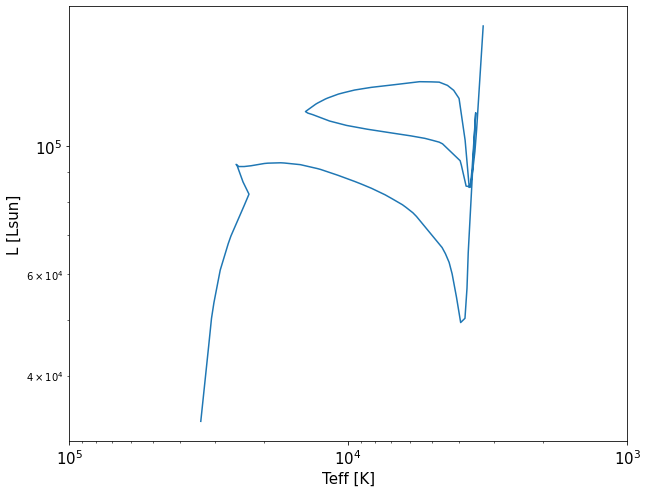

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Teff [K]",fontsize=15)
plt.ylabel("L [Lsun]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(1e5,1e3)

(100000.0, 1000.0)

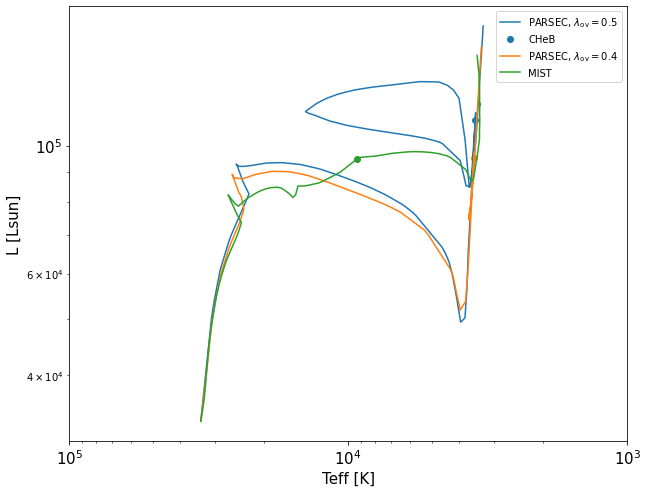

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity,label="PARSEC, $\lambda_\mathrm{ov}=0.5$")

CHeB=df[["Luminosity","Temperature"]][df.Phase==4].iloc[0]
plt.scatter(CHeB.Temperature, CHeB.Luminosity,label="CHeB")

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e5,1e3)


df=sse_pc04.output_df()
df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity,label="PARSEC, $\lambda_\mathrm{ov}=0.4$")
CHeB=df[["Luminosity","Temperature"]][df.Phase==4].iloc[0]
plt.scatter(CHeB.Temperature, CHeB.Luminosity)
plt.xscale("log")
plt.yscale("log")
plt.xlim(1e5,1e3)

df=sse_MIST.output_df()
df=df[df.Phase<7]
plt.plot(df.Temperature, df.Luminosity,label="MIST")
CHeB=df[["Luminosity","Temperature"]][df.Phase==4].iloc[0]
plt.scatter(CHeB.Temperature, CHeB.Luminosity)
plt.xscale("log")
plt.yscale("log")

plt.xlabel("Teff [K]",fontsize=15)
plt.ylabel("L [Lsun]",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.xlim(1e5,1e3)